In [55]:
# import our dataset from github
!git clone https://github.com/talyotti/house_data.git

fatal: destination path 'house_data' already exists and is not an empty directory.


In [56]:
# imports necessary modules for analysis and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


In [57]:
# import the training and testing datasets 
train = pd.read_csv('house_data/train.csv')
test = pd.read_csv('house_data/test (1).csv')
train.shape

(1460, 81)

In [58]:
test.shape

(1459, 80)

# Data analysis 

In [59]:
# Show the first five rows of the data 
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
# Show the type of data and number of null values to get ready for cleaning
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [61]:
# analysing the sales price (our dependent variable)
sns.displot(train['SalePrice']).set(title='Distribution of SalePrice')

In [62]:
# Show the correlation between variables
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [63]:
# plotting correlation heatmap
plt.figure(figsize=(25, 9))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
heatmap=sns.heatmap(train.corr(),mask=mask,cmap='coolwarm',center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})
plt.savefig('heatmap.png')

In [64]:
# plotting heatmap to see which elements are the most correlated with sale price
plt.figure(figsize=(6, 12))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),cmap='coolwarm',center=0,annot=True)

<AxesSubplot:>

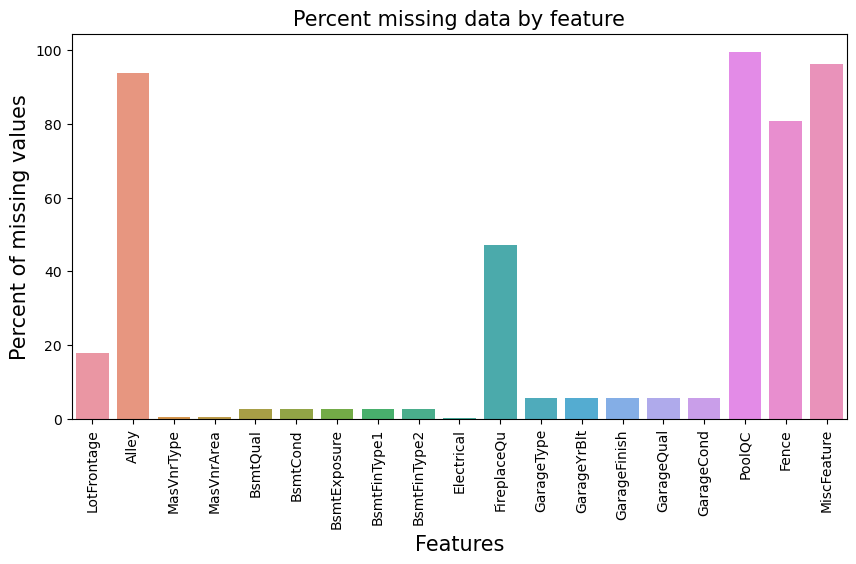

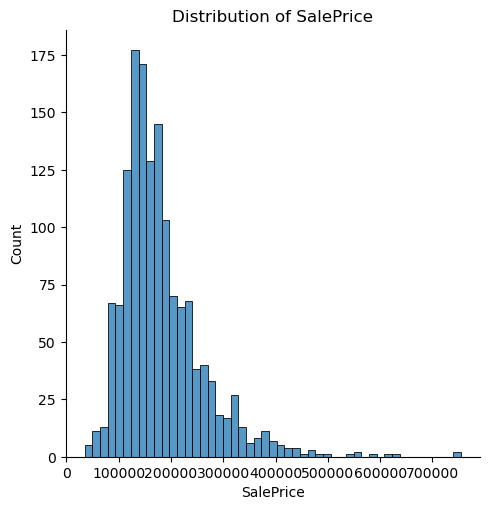

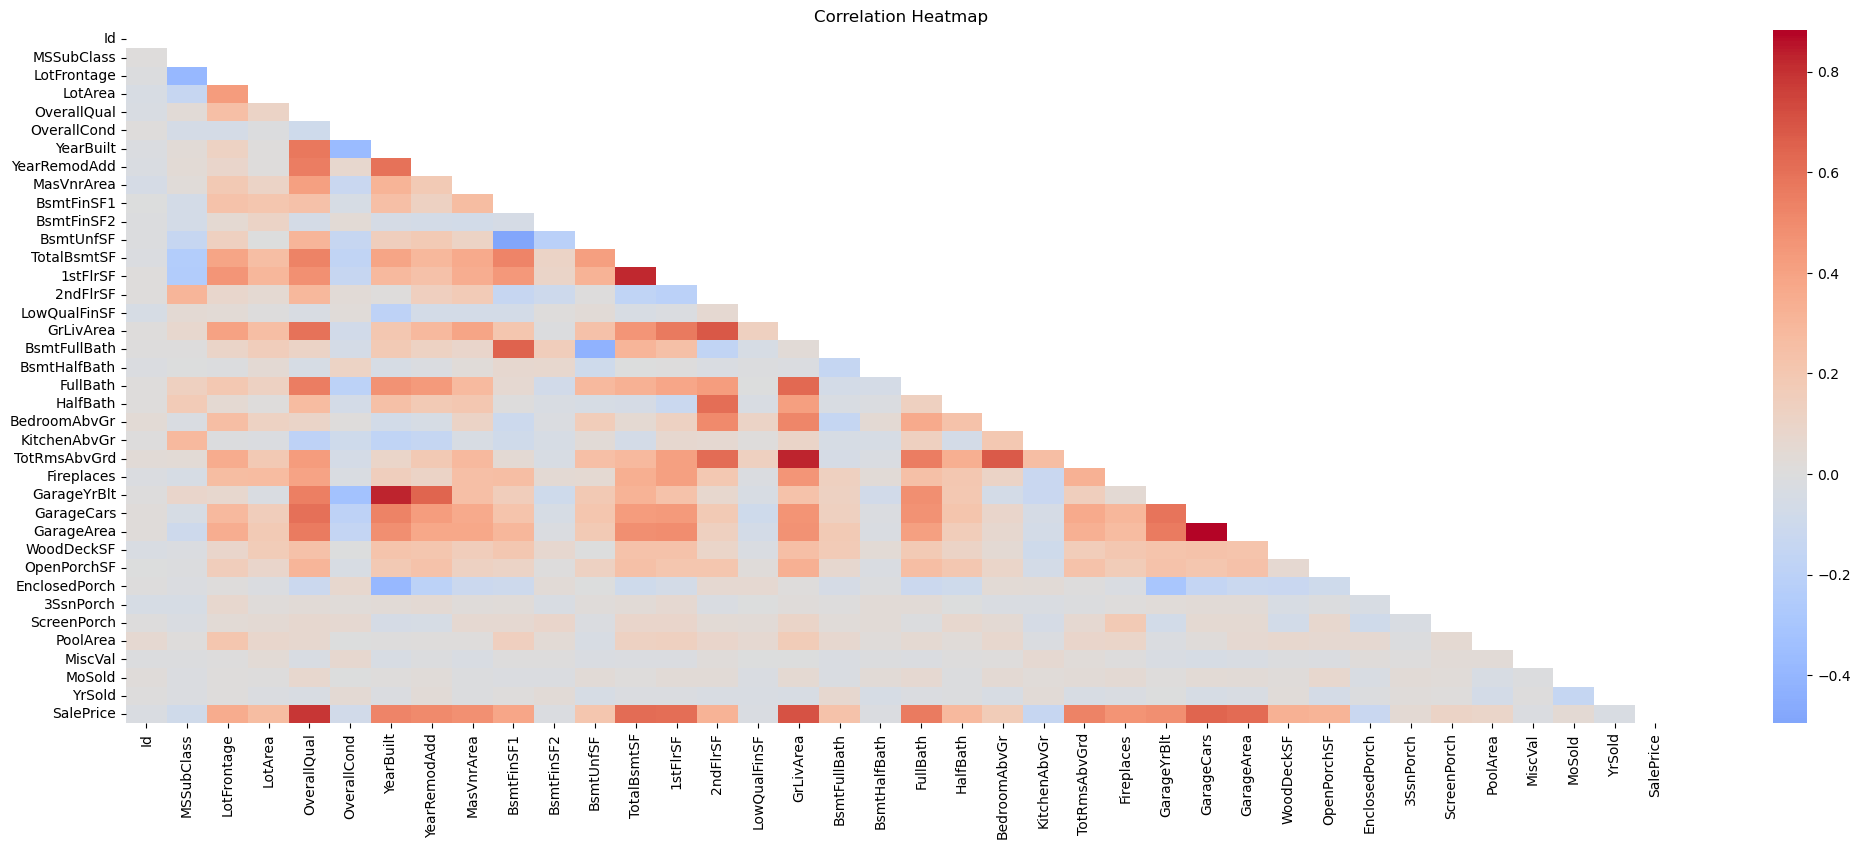

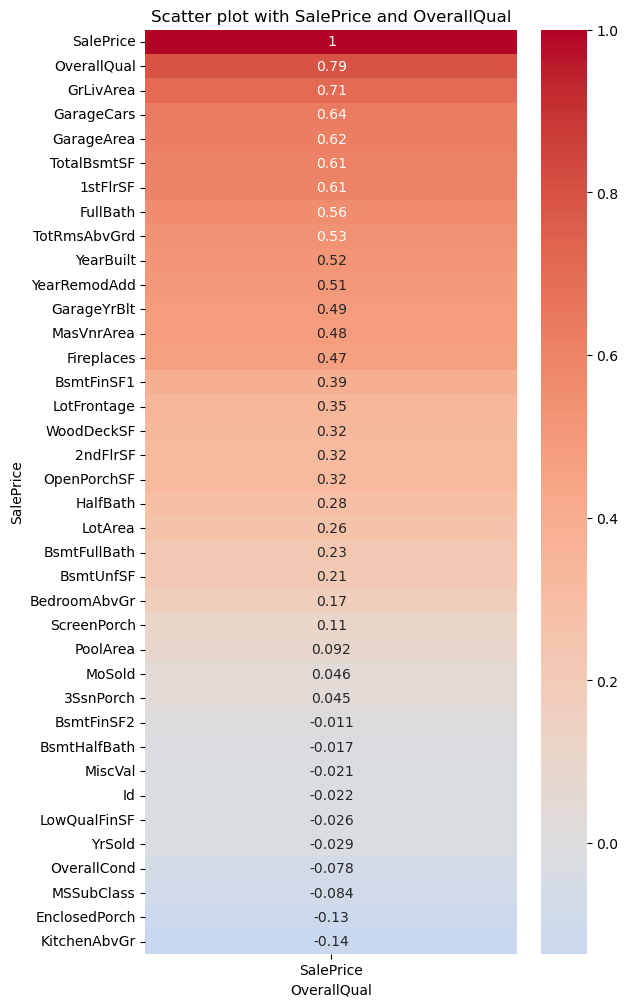

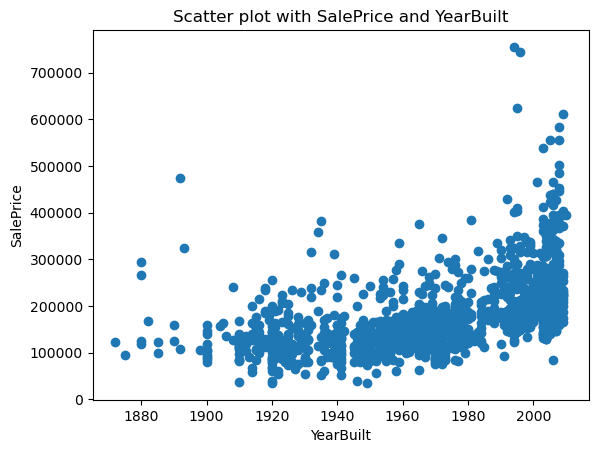

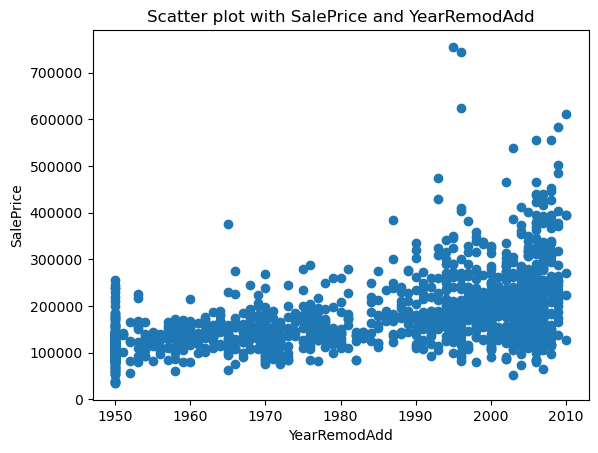

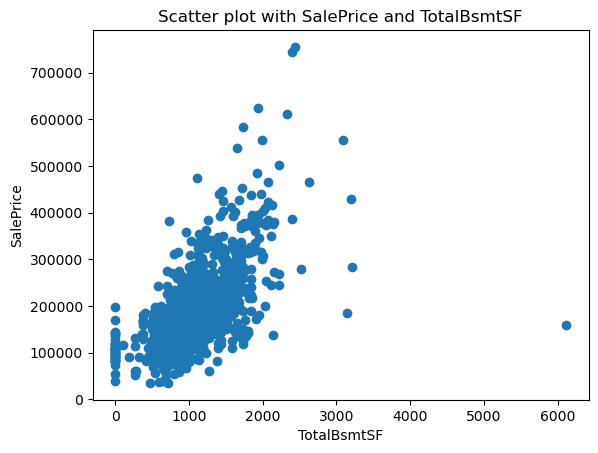

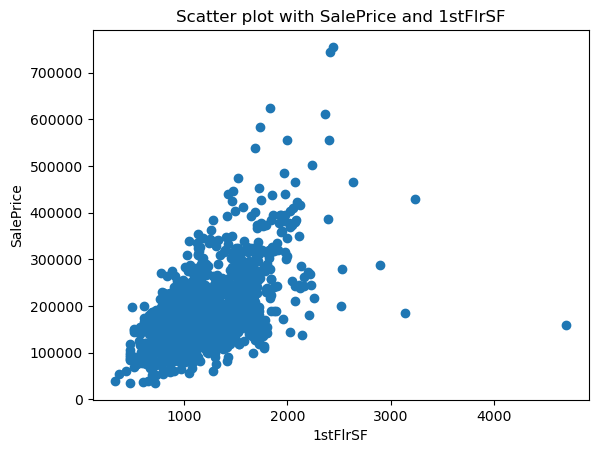

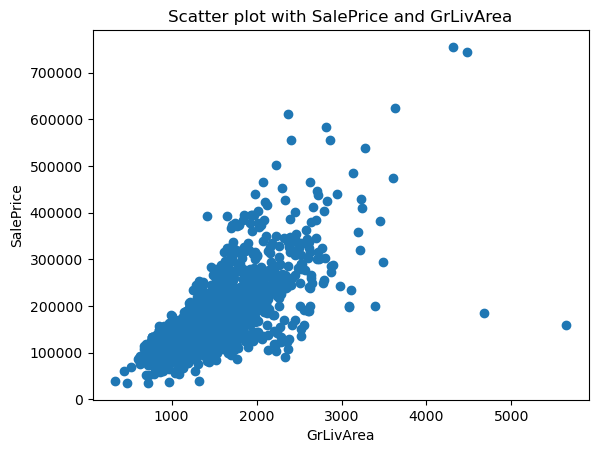

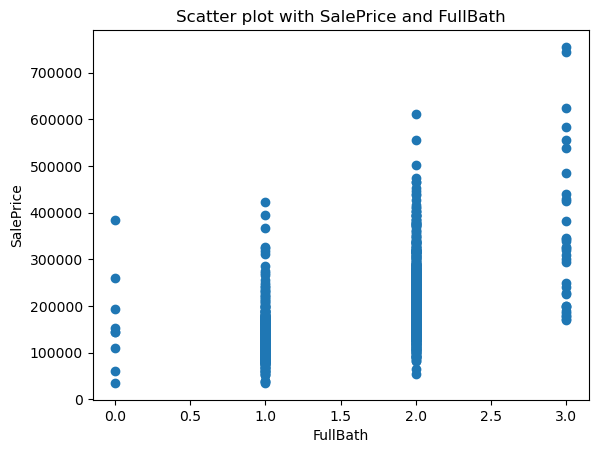

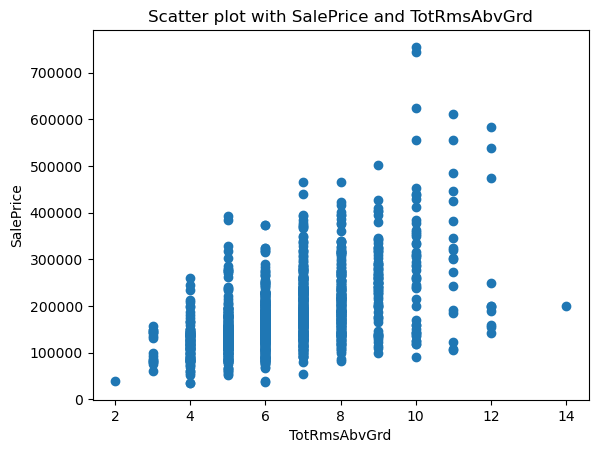

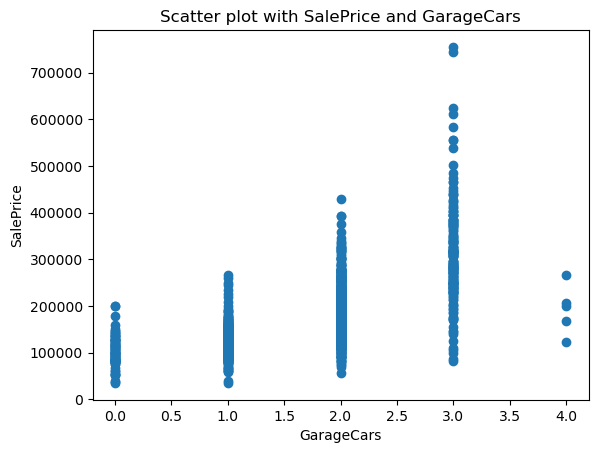

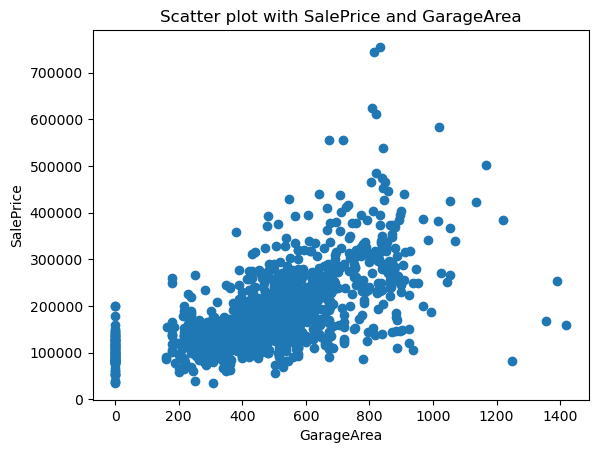

In [65]:
# plot scatter graph with most relevant variables 
cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
for col in cols:
    plt.scatter(train[col], train['SalePrice'])
    plt.title("Scatter plot with SalePrice and {}".format(col))
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

#Data cleaning


In [66]:
# Plot the percentage of missing values of column with missing values 
plt.figure(figsize=(10, 5))
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na[train_na > 0]
sns.barplot(x=train_na.index, y=train_na)
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5, 1.0, 'Percent missing data by feature')

In [67]:
# find columns with data type of strings and show the unique value in those columns
for i in train.columns: 
  if not pd.api.types.is_numeric_dtype(train[i]):
    print(i, train[i].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd'

In [68]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [69]:
# Drop cols with more than 50 missing values
num_missing_train = train.isnull().sum()
cols_to_drop_train = num_missing_train[num_missing_train > 50].keys()
train.drop(columns = cols_to_drop_train,inplace = True)
num_missing_test = test.isnull().sum()
cols_to_drop_test = num_missing_test[num_missing_test > 50].keys()
test.drop(columns = cols_to_drop_test,inplace = True)

In [70]:
pd.set_option('display.max_rows', 400)
train.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [71]:
# Seperate treatment of numerical and categorical columns and examine the null values
numerical_cols_train = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_test = test.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_train = train.select_dtypes(include='object').columns.tolist()
categorical_cols_test = test.select_dtypes(include='object').columns.tolist()
print(test[numerical_cols_test].isnull().sum()) # has null
print(train[numerical_cols_train].isnull().sum()) # has null
print(test[categorical_cols_test].isnull().sum()) # has null
print(train[categorical_cols_train].isnull().sum()) # has null

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64
Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
Gr

In [72]:
# Fill NaN in numerical cols with the mean
imputer = SimpleImputer(strategy='mean')
imputer.fit(train[numerical_cols_train])
train[numerical_cols_train] = imputer.transform(train[numerical_cols_train])
imputer.fit(test[numerical_cols_test])
test[numerical_cols_test] = imputer.transform(test[numerical_cols_test])
print(train[numerical_cols_train].isnull().sum())
print(test[numerical_cols_test].isnull().sum())

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64
Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0

In [73]:
# Select cols with strong correlation to SalesPrice
correlation = train[numerical_cols_train].corr().iloc[-1,:-1]
num_cols = correlation[correlation.abs() > 0.5].keys()
num_cols

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [74]:
# Fill NaN in categoricla cols with the mode
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(train[categorical_cols_train])
train[categorical_cols_train] = imputer.transform(train[categorical_cols_train])
imputer.fit(test[categorical_cols_test])
test[categorical_cols_test] = imputer.transform(test[categorical_cols_test])
print(test[categorical_cols_test].isnull().sum())
print(train[categorical_cols_train].isnull().sum())

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0

In [75]:
ordinal_cols = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'PavedDrive']
onehot_cols_1 = ['Street','LotConfig','RoofStyle','Foundation','Heating', 'Neighborhood', 'Condition1', 'Condition2', 'MSZoning', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType2', 'Electrical', 'Functional', 'SaleType', 'SaleCondition']
onehot_cols = []
for col in onehot_cols_1:
    if train[categorical_cols_train][col].nunique() <= 6:
        onehot_cols.append(col)
onehot_cols
train.CentralAir = np.where(train.CentralAir=='Y', 1, 0)
central_air_col = ['CentralAir']
test.CentralAir = np.where(test.CentralAir=='Y', 1, 0)

In [76]:
useful_cols = [col for col in train.columns if 
                    col in onehot_cols or 
                    col in ordinal_cols or 
                    col in central_air_col or 
                    col in num_cols]

In [77]:
preprocessor = ColumnTransformer(
                [('Ordinal_Encoder', OrdinalEncoder(), ordinal_cols),
                 ('One_Hot_Encoder', OneHotEncoder(handle_unknown='ignore', sparse=False), onehot_cols)])

#Machine learning 

In [78]:
from sklearn.model_selection import train_test_split
# Split the target variable from the dataset
y = train['SalePrice']
X = train[useful_cols]
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
# Linear Regression
pipeline_simple_linear_regression = Pipeline(steps=[('preprocessor', preprocessor), ('lr', LinearRegression())])

# Train
pipeline_simple_linear_regression.fit(X_train, y_train)

# Prediction
y_pred = pipeline_simple_linear_regression.predict(X_val)

score = mean_absolute_error(y_val, y_pred)
print('MAE:', score)

MAE: 35217.1301369863


In [80]:
pipeline_decision_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Train
pipeline_decision_tree.fit(X_train, y_train)

# Prediction
y_pred = pipeline_decision_tree.predict(X_val)

score = mean_absolute_error(y_val, y_pred)
print('MAE:', score)

MAE: 42817.07379321592


In [81]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
pipeline_random_forest = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

# Train
pipeline_random_forest.fit(X_train, y_train)

# Prediction
y_pred = pipeline_random_forest.predict(X_val)

score = mean_absolute_error(y_val, y_pred)
print('MAE:', score)

MAE: 33007.20344188612


In [82]:
# controlling overfitting and underfitting
def get_mae(max_depth, X_train, X_val, y_train, y_val):
    model = RandomForestRegressor(max_depth=max_depth, n_estimators=100, random_state=0)
    pipeline_random_forest = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    pipeline_random_forest.fit(X_train, y_train)
    preds_val = pipeline_random_forest.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val)
    return(mae)

In [83]:
# compare MAE with differing values of max_depth
for max_depth in [5, 10, 15, 20, 30, 50, 100]:
    my_mae = get_mae(max_depth, X_train, X_val, y_train, y_val)
    print("Max depth: %d  \t\t Mean Absolute Error:  %d" %(max_depth, my_mae))


Max depth: 5  		 Mean Absolute Error:  33050
Max depth: 10  		 Mean Absolute Error:  31935
Max depth: 15  		 Mean Absolute Error:  32586
Max depth: 20  		 Mean Absolute Error:  33047
Max depth: 30  		 Mean Absolute Error:  33005
Max depth: 50  		 Mean Absolute Error:  33007
Max depth: 100  		 Mean Absolute Error:  33007


The optimal number from these options is 10 since it gives the lowest value for Mean Absolute Error.

In [84]:
# redoing the model with 10 depth
model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
pipeline_random_forest = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

# Train
pipeline_random_forest.fit(X_train, y_train)

# Prediction
y_pred = pipeline_random_forest.predict(X_val)

score = mean_absolute_error(y_val, y_pred)
print('MAE:', score)

MAE: 31935.069462509295


In [85]:
# predict the test dataset
y_saleprice_pred = pipeline_random_forest.predict(test[useful_cols])

# Submission
output=pd.DataFrame({'Id':range(1461,2920),'SalePrice':y_saleprice_pred})
output.to_csv('submission_house_price.csv',index=False)
output.head()

,Id,SalePrice
0,1461,115719.777678
1,1462,200836.832546
2,1463,170221.049091
3,1464,199866.717118
4,1465,197057.747343
